## Step 2: Data Understanding

# Table of Contents

1. [Check countries and years column](#check-countries-and-years-column)
2. [Statistical properties (univariate)](#statistical-properties-univariate)
    1. [Status column](#status-column)
    2. [Numerical columns](#numerical-columns)
3. [Correlations](#correlations)
4. [Data quality](#data-quality)
    1. [Missing values](#missing-values)
    2. [Outliers](#outliers)

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [56]:
df_who = pd.read_csv('../data/Life_Expectancy_Data.csv')

In [57]:
# Display data shape and column data types
print("Data shape:")
print(df_who.shape)

print("\nData types:")
print(df_who.dtypes)

Data shape:
(2938, 22)

Data types:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


**Feature Understanding**

- Country: Nominal; country names.
- Year: Time/Discrete; years (2000–2015).
- Status: Nominal; development status (Developed/Developing).
- Life expectancy: Continuous; years.
- Adult mortality: Discrete; deaths per 1000 inhabitants.
- Infant deaths: Discrete; deaths per 1000 inhabitants.
- Alcohol: Continuous; litres per capita/year.
- Percentage expenditure: Continuous; health expenditure/GDP per capita.
- Hepatitis B: Discrete; immunization coverage (%).
- Measles: Discrete; cases per 1000 inhabitants.
- BMI: Continuous; average population BMI.
- Under-five deaths: Discrete; deaths per 1000 inhabitants.
- Polio: Discrete; immunization coverage (%).
- Total expenditure: Continuous; health/total government expenditure (%).
- Diphtheria: Discrete; immunization coverage (%).
- HIV/AIDS: Continuous; deaths (0–4 years) per 1000 live births.
- GDP: Continuous; USD per capita.
- Population: Discrete; total count.
- Thinness 1-19 years: Continuous; % of “very thin”.
- Thinness 5-9 years: Continuous; % of “very thin”.
- Income composition of resources: Continuous; human development index (0–1).
- Schooling: Continuous; years.

The dataset contains 2938 rows and 22 columns. The datatypes are mostly numerical.

### Check countries and years column

The dataset is structured by country and year, therefore we check those attributes first. The hypothesis is that each country has data for the years 2000 to 2015. Let's check that.

In [58]:
df_who.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [59]:
# Get the unique years in the dataset
unique_years = set(df_who['Year'])
print(f"Unique years: {unique_years}\n")

# Group the data by country and check if each country has the same years
consistent_years = df_who.groupby('Country')['Year'].apply(lambda x: set(x) == unique_years)

# Get the countries with inconsistent years
inconsistent_countries = consistent_years[consistent_years == False].index

# Get the inconsistent years for each country
inconsistent_years = df_who[df_who['Country'].isin(inconsistent_countries)].groupby('Country')['Year'].apply(lambda x: unique_years - set(x))

print(f"Countries where not all years from 2000 to 2015 are present: {inconsistent_countries}")

Unique years: {2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}

Countries where not all years from 2000 to 2015 are present: Index(['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru',
       'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu'],
      dtype='object', name='Country')


The unique years are indeed 2000 to 2015. For the 10 countries printed above, not all those years are present. For all other countries, they are.

In [60]:
# Filter the dataframe to only include rows from the countries in inconsistent_countries
inconsistent_data = df_who[df_who['Country'].isin(inconsistent_countries)]

# Get the count of inconsistent countries
print(f"Number of countries where not all years are present:\n{len(list(inconsistent_data['Country']))}")

# Display the dataframe
inconsistent_data

Number of countries where not all years are present:
10


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


We can see that the 10 countries that do not have the years 2000 to 2015 all have data for only 2013.

Conclusion:
- All countries except a few have consistent data for all years from 2000 to 2015
- The exceptions (10) are ['Cook Islands','Dominica','Marshall Islands','Monaco','Nauru','Niue','Palau','Saint Kitts and Nevis','San Marino','Tuvalu']. They all have only data for 1 year (2013).

### Statistical properties (univariate)

#### Status column

In [61]:
print(f"Unique values of status: {df_who['Status'].unique()}\n")

# Group the data by country and check if the number of unique Status values is 1
consistent_status = df_who.groupby('Country')['Status'].nunique() == 1

print(consistent_status.all())

Unique values of status: ['Developing' 'Developed']

True


In the dataset, a country is either Developed or Developing. It does not change over the years.

In [62]:
# Get the unique status values for each country
unique_status_per_country = df_who.groupby('Country')['Status'].unique()

# Count the number of developing and developed countries
status_counts = unique_status_per_country.apply(lambda x: x[0]).value_counts()

# Calculate the proportion
proportion_developing = status_counts['Developing'] / 193
proportion_developed = status_counts['Developed'] / 193

print(f"Proportion of Developing countries: {proportion_developing:.2f}\nTotal: {status_counts['Developing']}")
print(f"Proportion of Developed countries: {proportion_developed:.2f}\nTotal: {status_counts['Developed']}")

Proportion of Developing countries: 0.83
Total: 161
Proportion of Developed countries: 0.17
Total: 32


There is an imbalance in the status column towards Developing countries.

### Numerical columns

Most of the attributes are numerical. We can look at their distributions using histograms.

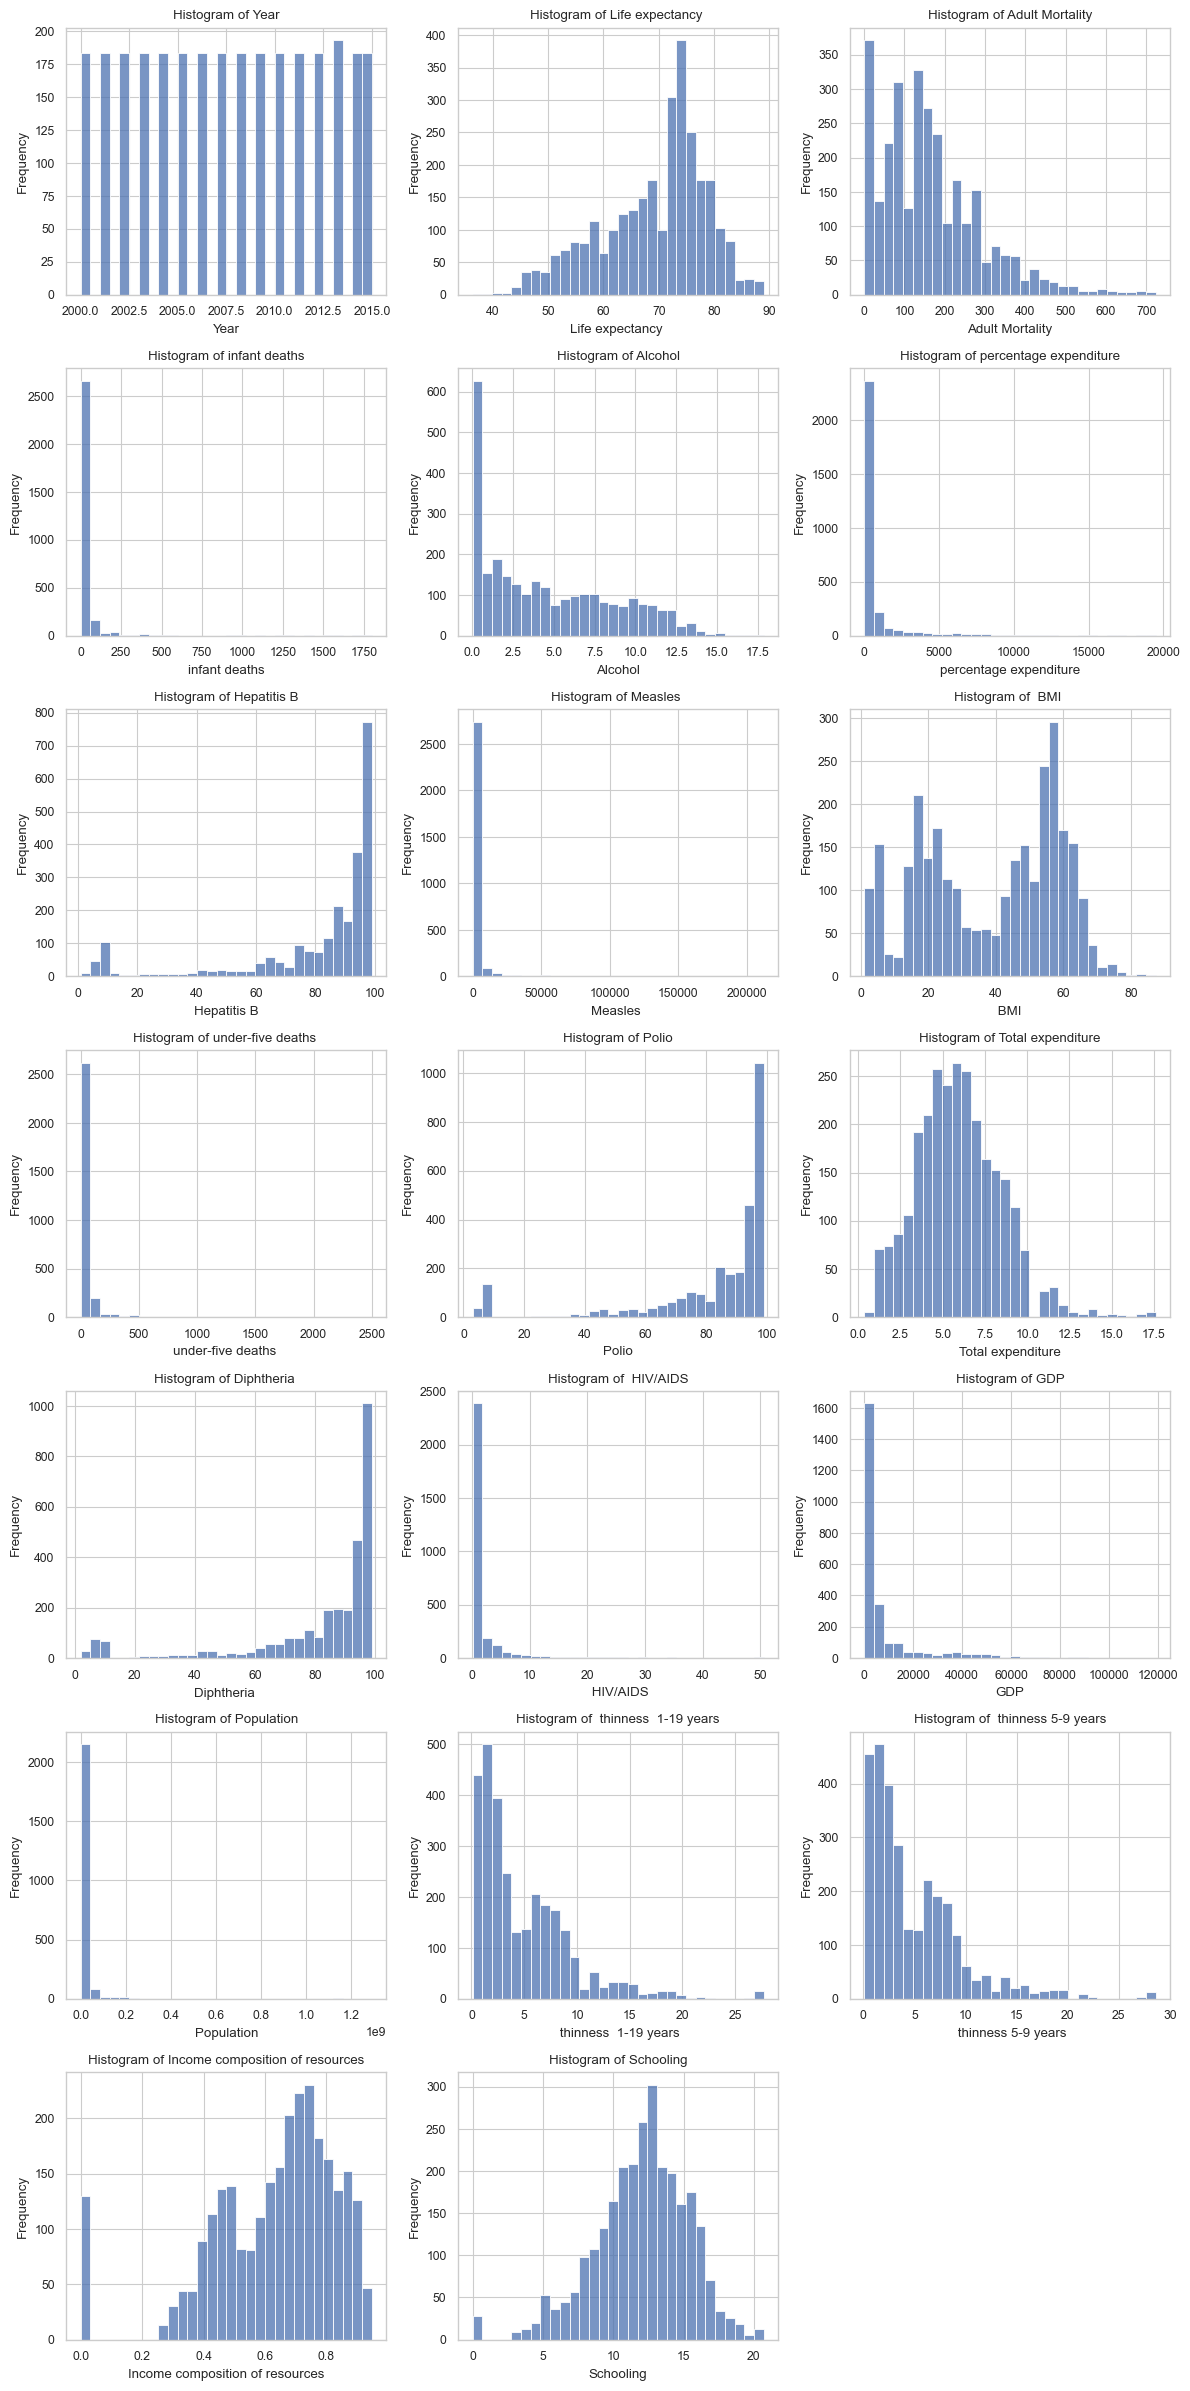

In [45]:
# Get numerical columns
numerical_columns = df_who.select_dtypes(include=['float64', 'int64']).columns

# Create a figure with 3 columns and 7 rows
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for numerical columns
for i, column in enumerate(numerical_columns):
    sns.histplot(df_who[column], bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide the last empty subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

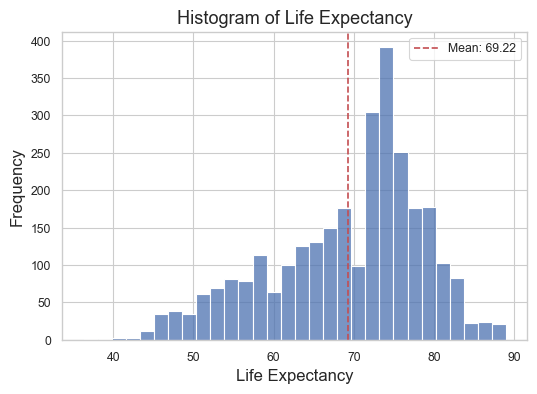

In [46]:
# Set the theme for the plot
sns.set_theme(style="whitegrid", palette="deep", context="paper")

# Create the histogram for life expectancy
plt.figure(figsize=(6, 4))
sns.histplot(df_who['Life expectancy '].dropna(), bins=30)
plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.grid(True)

# Calculate the mean of life expectancy
mean_life_expectancy = df_who['Life expectancy '].mean()

# Add a vertical line for the mean
plt.axvline(mean_life_expectancy, color='r', linestyle='--', label=f'Mean: {mean_life_expectancy:.2f}')

# Increase the fontsize of the x and y axis labels and the title
plt.xlabel('Life Expectancy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Life Expectancy', fontsize=13)

# Add a legend
plt.legend()

# Save the plot as an SVG file
#plt.savefig('life_expectancy_histogram.svg', format='svg')

# Show the plot
plt.show()


Observations: 
- In the histogram for `Year` we see again what we found before, the year 2013 occurs more often due to the 10 countries further up in the notebook that only have data for that year
- A lot of the attributes are heavily right or left skewed (e.g.Diphteria, Thinness, ...)
- A lot of possible outliers at the far tails of the distributions

We describe all the numerical columns using the min, median and max. This gives us a rough overview of distribution and plausibleness with just a few numbers.

In [47]:
summary_df = df_who.describe().loc[['min', '50%', 'max']]
summary_df.rename(index={'50%': 'median'}, inplace=True)
summary_df.drop('Year', axis=1, inplace=True)
summary_df = summary_df.round(0)
summary_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
min,36.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,2.0,3.400000e+01,0.0,0.0,0.0,0.0
median,72.0,144.0,3.0,4.0,65.0,92.0,17.0,44.0,4.0,93.0,6.0,93.0,0.0,1767.0,1.386542e+06,3.0,3.0,1.0,12.0
max,89.0,723.0,1800.0,18.0,19480.0,99.0,212183.0,87.0,2500.0,99.0,18.0,99.0,51.0,119173.0,1.293859e+09,28.0,29.0,1.0,21.0


**Extreme values:**

- Max life expectancy of 89 years (WHO estimate)
- Max adult mortality of 723 per 1000
- Max BMI of 87 and min BMI of 1 (indicating extreme obesity and underweight)
- Population of 34 and 0 schooling years need closer evaluation

**Illogical values:**

- 1800 infant deaths per 1000, 2500 under-five deaths per 1000, 212183 measles cases per 1000 (measles can only be contracted once)

### Correlations

Since life expectancy is of main interest for this dataset, we look at the scatterplots of life expectancy with the other variables.

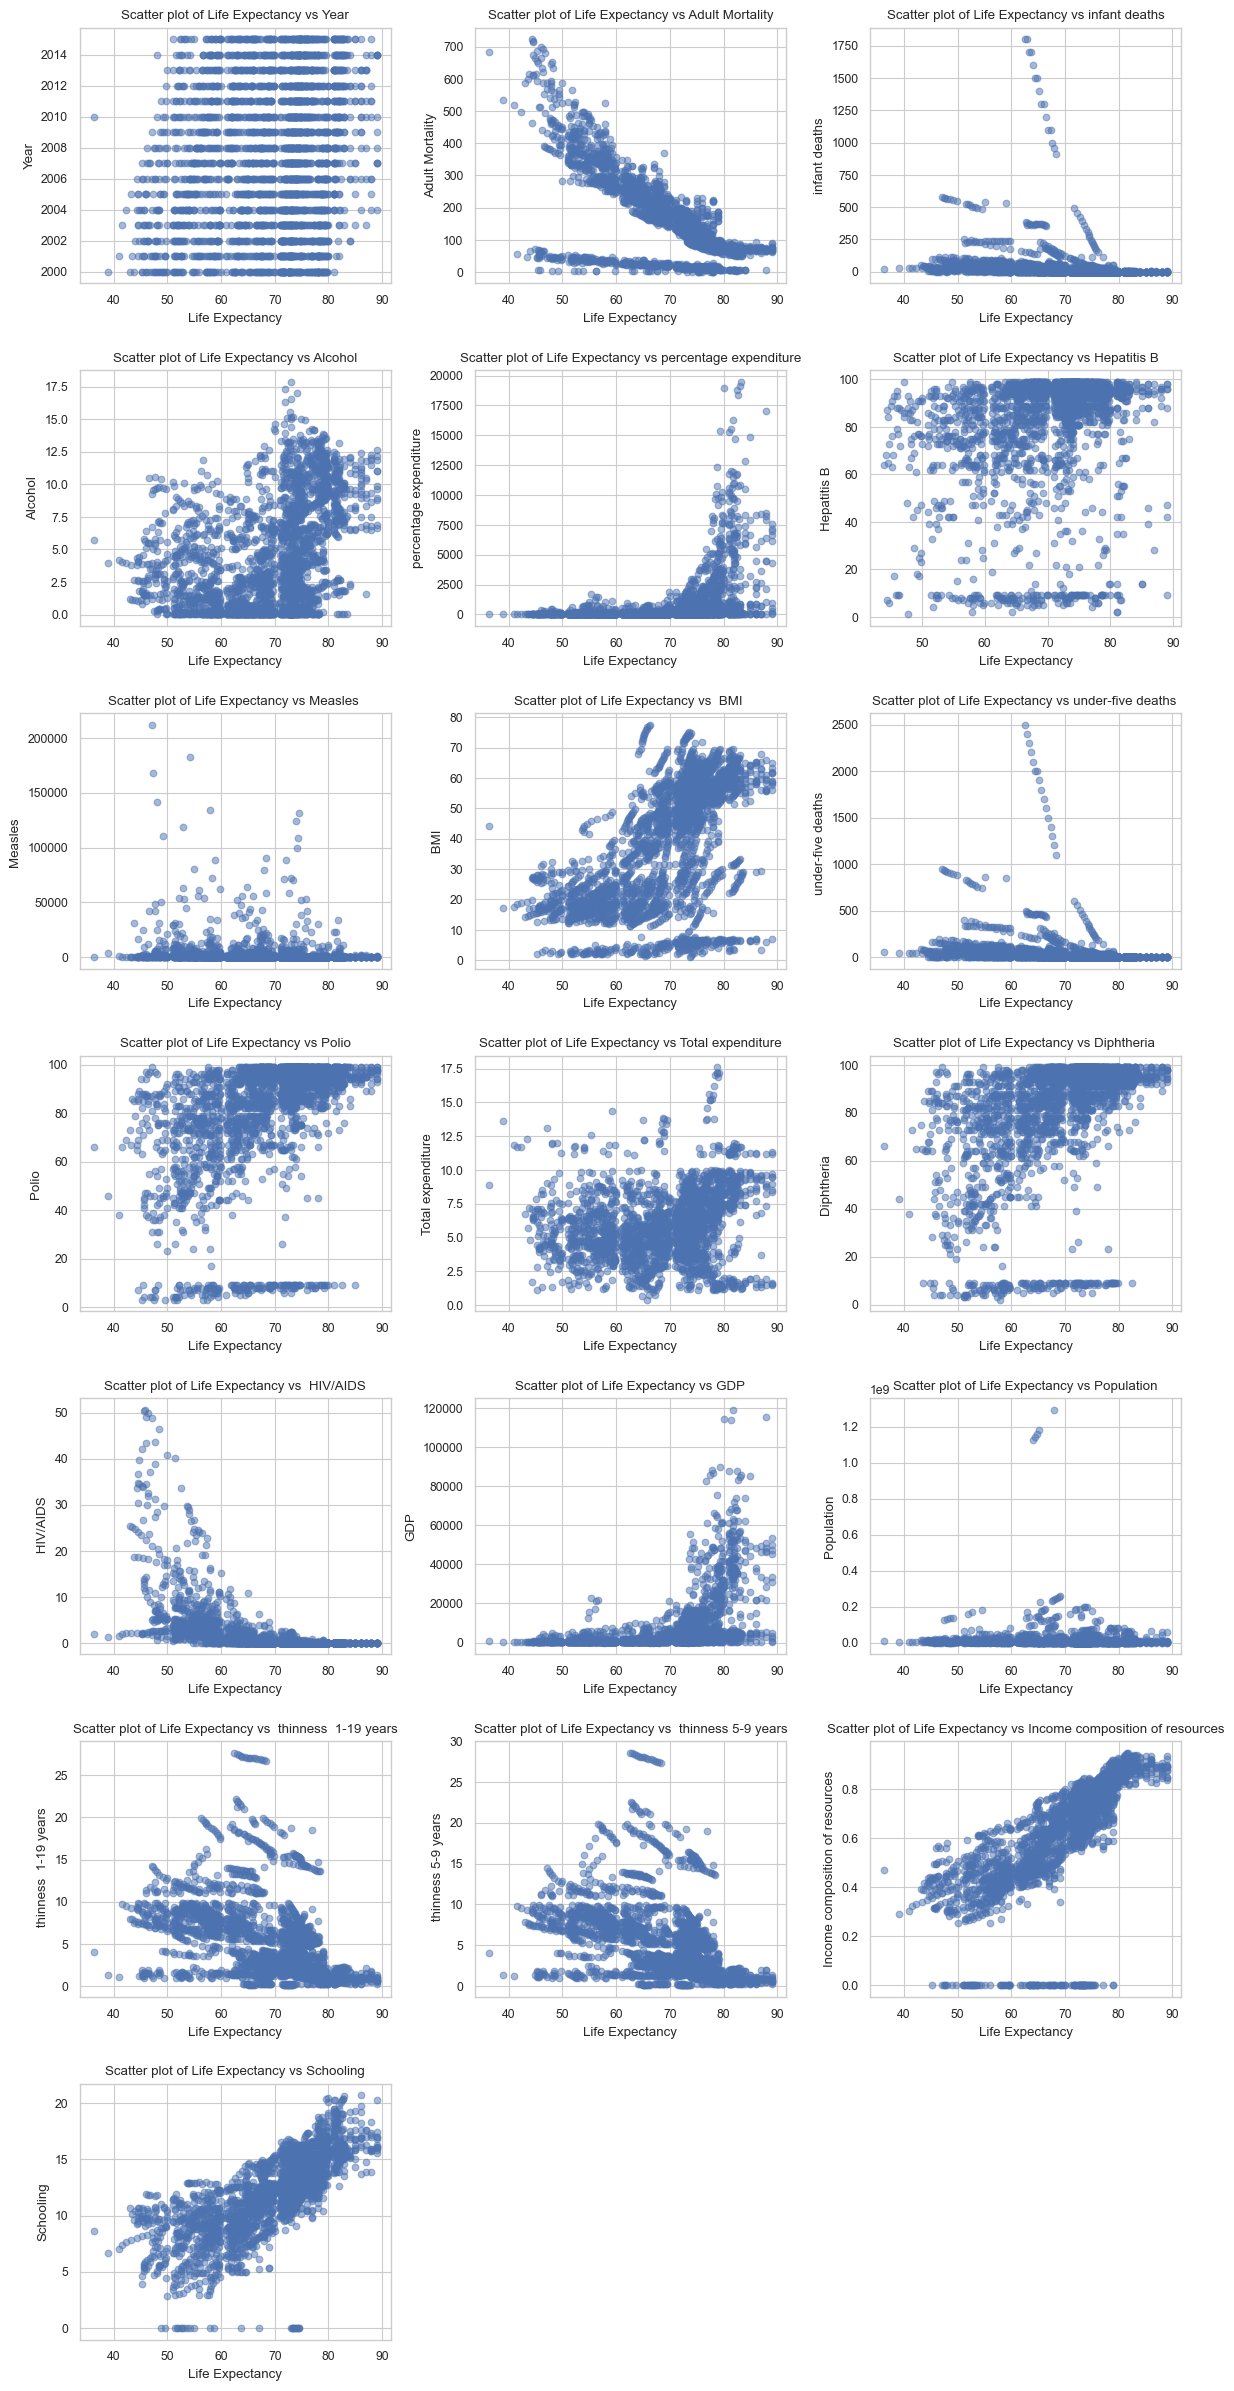

In [48]:
# List of numerical columns excluding 'Life expectancy'
numerical_columns_wo = numerical_columns.drop('Life expectancy ')

# Create a figure with 3 columns and 7 rows
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for numerical columns excluding 'Life expectancy'
for i, column in enumerate(numerical_columns_wo):
    axes[i].scatter(df_who['Life expectancy '], df_who[column], alpha=0.5)
    axes[i].set_title(f'Scatter plot of Life Expectancy vs {column}')
    axes[i].set_xlabel('Life Expectancy')
    axes[i].set_ylabel(column)
    axes[i].grid(True)

# Hide the last two empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

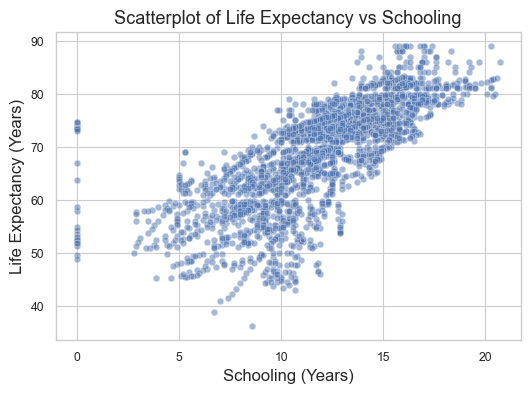

In [49]:
# Set the theme for the plot
sns.set_theme(style="whitegrid", palette="deep", context="paper")

# Create the scatter plot for life expectancy vs schooling
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_who['Schooling'], y=df_who['Life expectancy '], alpha=0.5)
plt.title('Scatterplot of Life Expectancy vs Schooling', fontsize=13)
plt.xlabel('Schooling (Years)', fontsize=12)
plt.ylabel('Life Expectancy (Years)', fontsize=12)
plt.grid(True)

# Save the plot as an SVG file
#plt.savefig('life_expectancy_vs_schooling.svg', format='svg')

# Show the plot
plt.show()

Let's also look at correlations between all numerical features.

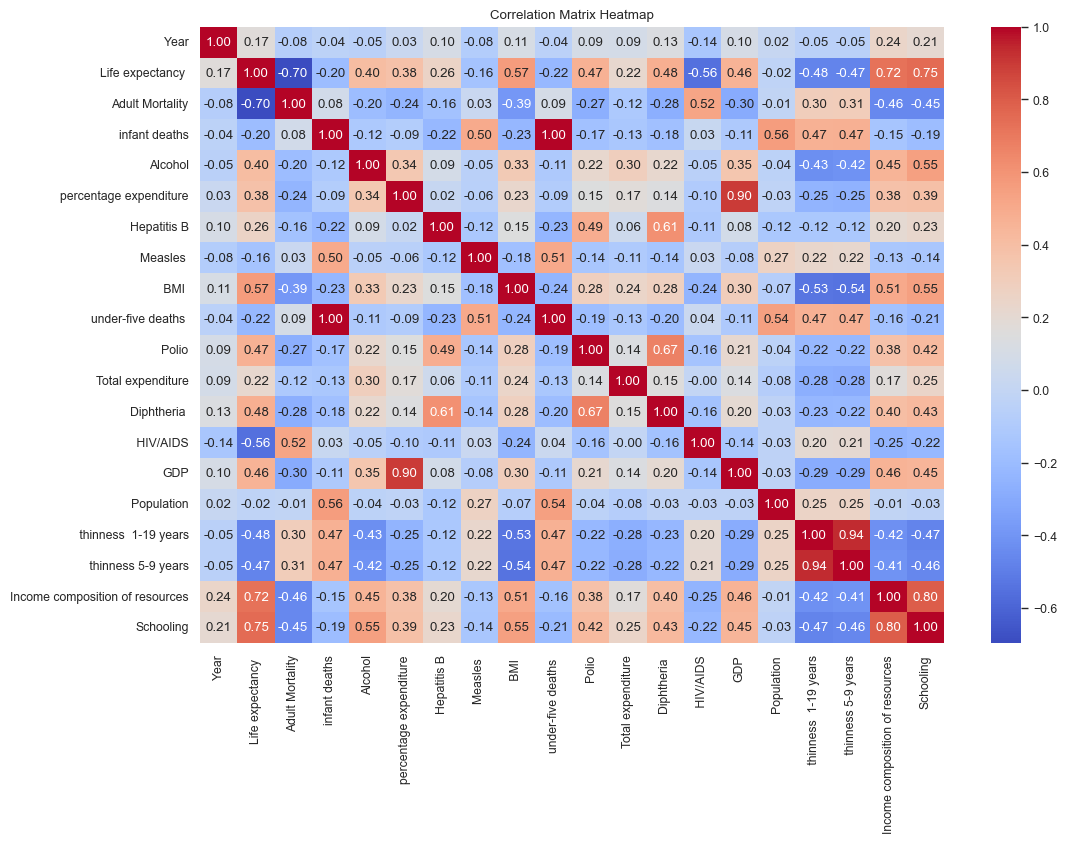

In [50]:
numeric_data = df_who.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
correlation_matrix

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Observations**
- U5 deaths and infant deaths have a perfect correlation and may contain redundant information.
- Thinness 1-19 and 5-9 years also have very high correlations, using both may be unnecessary
- 0.9 corr between percentage expenditure (is a ratio health expenditure / GDP) and GDP 
- Income composition of resources - schooling very similar (index seems to weigh education strongly) and also very similar correlations with other attributes
- Strongest predictors for life expectancy are adult mortality (less surprising),hiv/aids, bmi, and human development index/schooling, ...

### Data quality

#### Missing values

In [51]:
missing_values = df_who.isnull().sum()
print(f"Missing value total counts:\n{missing_values}\n")
print(f"Missing value proportions:\n{missing_values / df_who.shape[0]}")

Missing value total counts:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Missing value proportions:
Country                            0.000000
Year                         

**General missing value considerations**

- The WHO combines data from various sources, with availability depending on the country
- Data represents aggregates like averages and percentages for entire populations
- Metrics like GDP and vaccination coverage are universally applicable
- therefore missing values are generally due to data being unavailable, not because the metric doesn’t exist

- Highest number of missing values is about 22% for a column
- As some considerable portions of the data are missing, appropriate strategies will have to be implemented to deal with this.



#### Outliers

Let's look at outliers and distributions using boxplots.

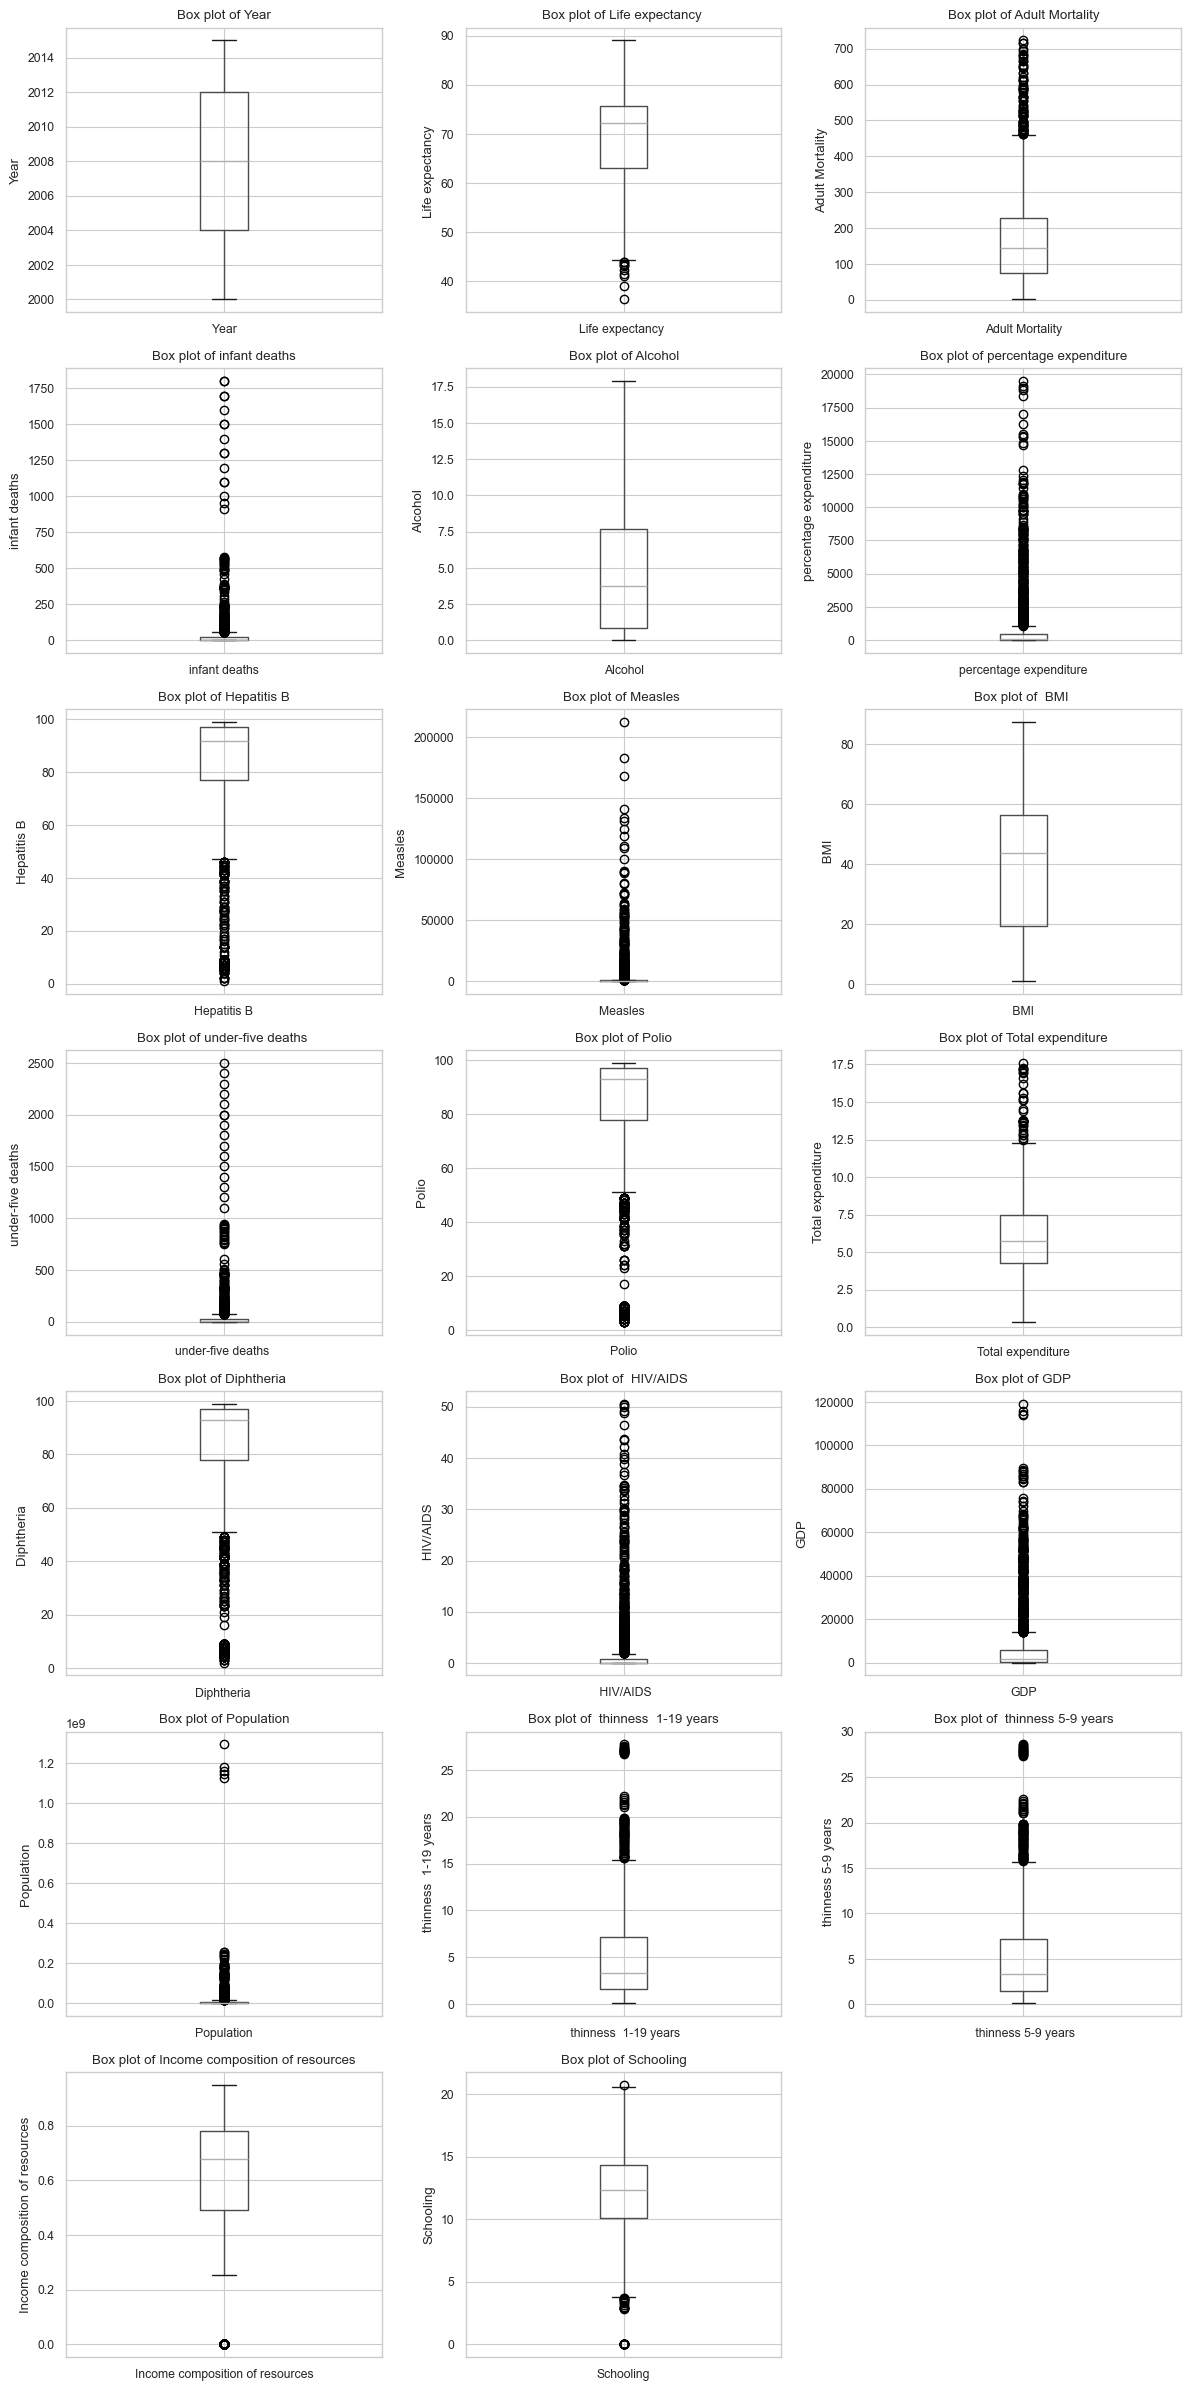

In [52]:
# Create box plots for each numerical column
# Create a figure with 3 columns and 7 rows
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot box plots for numerical columns
for i, column in enumerate(numerical_columns):
    df_who.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')
    axes[i].set_ylabel(column)

# Hide the last empty subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

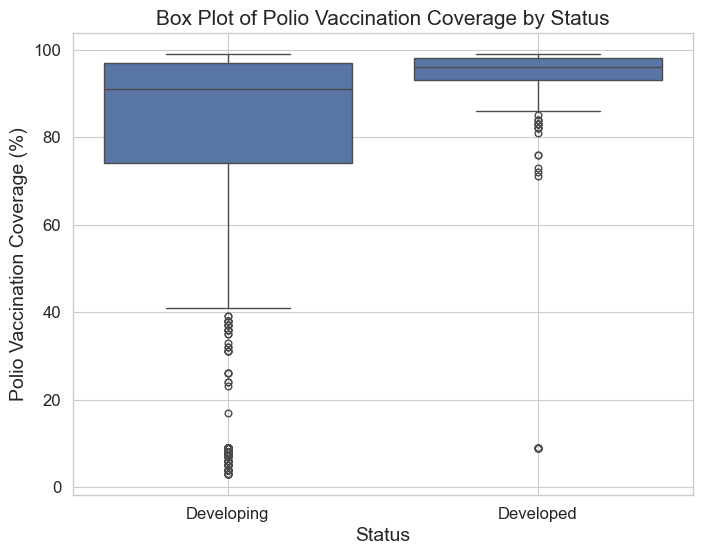

In [53]:
# Create the box plot for Polio
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_who['Status'], y=df_who['Polio'].dropna())
plt.title('Box Plot of Polio Vaccination Coverage by Status', fontsize=15)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Polio Vaccination Coverage (%)', fontsize=14)
plt.grid(True)

# Change the tick labels to a slightly larger font
plt.tick_params(axis='both', which='major', labelsize=12)

# Save the plot as an SVG file
#plt.savefig('polio_boxplot.svg', format='svg')

# Show the plot
plt.show()


Calculate outlier numbers.

In [54]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = df_who[numerical_columns].quantile(0.25)
Q3 = df_who[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = ((df_who[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_who[numerical_columns] > (Q3 + 1.5 * IQR)))

# Count the number of outliers in each numerical column
outlier_counts = outliers.sum()

print(outlier_counts / df_who.shape[0])

Year                               0.000000
Life expectancy                    0.003404
Adult Mortality                    0.027910
infant deaths                      0.107216
Alcohol                            0.000000
percentage expenditure             0.132403
Hepatitis B                        0.086453
Measles                            0.184479
 BMI                               0.000000
under-five deaths                  0.134105
Polio                              0.094963
Total expenditure                  0.010892
Diphtheria                         0.101430
 HIV/AIDS                          0.184479
GDP                                0.124234
Population                         0.100068
 thinness  1-19 years              0.030293
 thinness 5-9 years                0.032675
Income composition of resources    0.044248
Schooling                          0.014976
dtype: float64


For outliers, like missing values, considerable portions of the dataset are affected, with about 18% in the measles column.